In [53]:
import np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
from math import floor, ceil

In [54]:
logs = []
for filename in glob("logs/*.txt"):
    print(filename)
    with open(filename) as logfile:
        log = pd.DataFrame(list(map(eval, logfile.readlines())))
        logs.append(log)

logs[0]

logs\roberta_noisy_layerdrop_0.0.txt
logs\roberta_noisy_layerdrop_0.2.txt
logs\roberta_noisy_layerdrop_0.5.txt
logs\roberta_noisy_layerdrop_0.7.txt


,loss,learning_rate,epoch,step,eval_loss,eval_accuracy,eval_precision,eval_recall,eval_f1,eval_kappa,eval_runtime,eval_samples_per_second,eval_steps_per_second,train_runtime,train_samples_per_second,train_steps_per_second,total_flos,train_loss
0,0.8039,1.919420e-05,0.20,500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.7533,1.838840e-05,0.40,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.6313,1.758259e-05,0.60,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.5927,1.677679e-05,0.81,2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,1.00,2482,0.548047,0.723384,0.691889,0.723384,0.694317,0.510690,50.0587,170.000,21.255,NaN,NaN,NaN,NaN,NaN
5,0.5822,1.597099e-05,1.01,2500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.5139,1.516519e-05,1.21,3000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0.4811,1.435939e-05,1.41,3500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0.4720,1.355359e-05,1.61,4000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.4719,1.274778e-05,1.81,4500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
def plot(model, ld):
    modelLoss = model[~model.loss.isna()].reset_index()[["loss", "learning_rate", "epoch", "step"]]
    modelTrain = model[model.loss.isna()].iloc[-1].dropna().drop(("epoch")).drop("step").to_dict()
    modelEval = model[model.loss.isna()].iloc[:-1].reset_index().drop(columns=["index", "loss", "learning_rate", "step", "train_runtime", "train_samples_per_second", "train_steps_per_second", "total_flos", "train_loss"])
    modelEval.epoch = modelEval.epoch.astype(int)
    modelEval = modelEval.set_index("epoch")
    ax = modelLoss.plot(y="loss", x="epoch", figsize=(16, 8), ylabel="Loss", xlabel="Epoch", title=f"Loss Curve of RoBERTa Noisy Student (LayerDrop={ld}) Model", legend=False, xlim=(0,5))
    colors = ["#ACDDDE", "#CAF1DE", "#E1F8DC", "#FEF8DD", "#FFE7C7", "#F7D8BA", "#D6CDEA"]
    #colors = ["#003049", "#D62828", "#FF7F00", "#FCBF49", "#EAE2B7"]
    #colors = ["#581845", "#900C3F", "#C70039", "#FF5733", "#FFC300"]
    for epoch, color in zip(range(5), colors):
        ax.axvspan(epoch, epoch+1, alpha=0.5, color=color)
    return modelLoss, modelTrain, modelEval

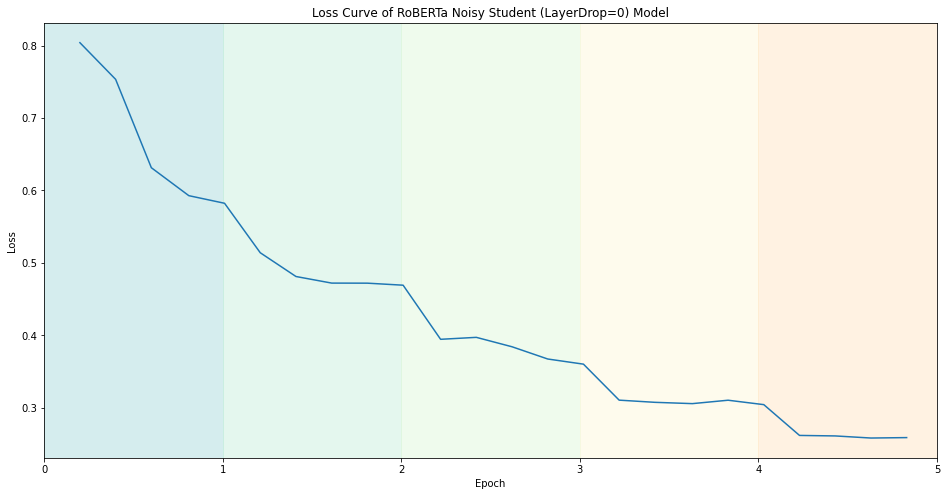

In [56]:
rob1Loss, rob1Train, rob1Eval = plot(logs[0], 0)

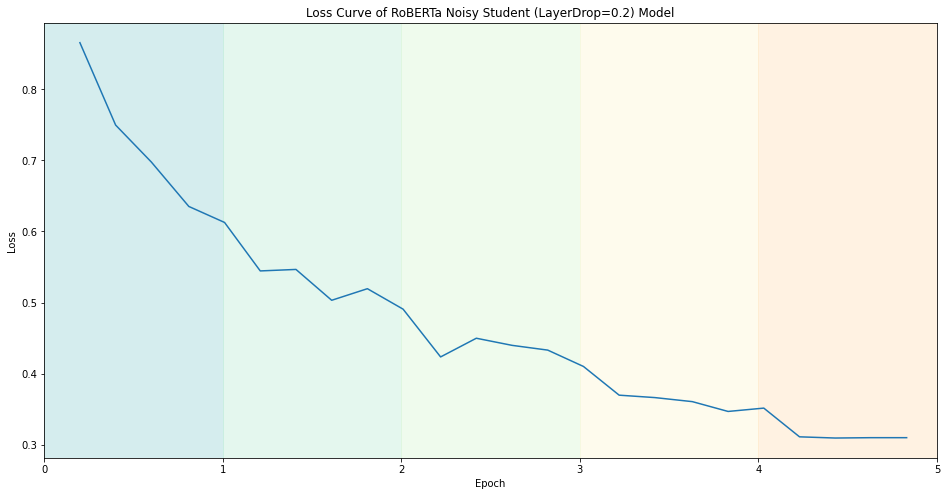

In [57]:
rob2Loss, rob2Train, rob2Eval = plot(logs[1], 0.2)

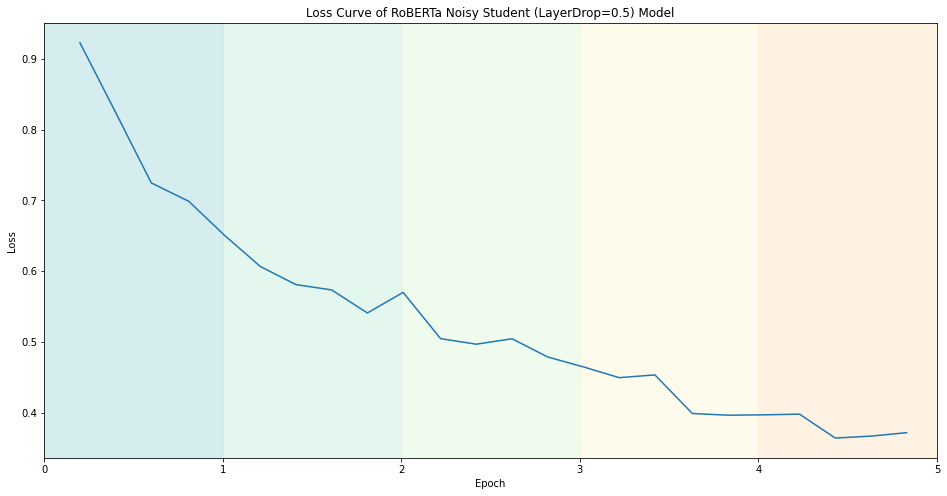

In [58]:
rob3Loss, rob3Train, rob3Eval = plot(logs[2], 0.5)

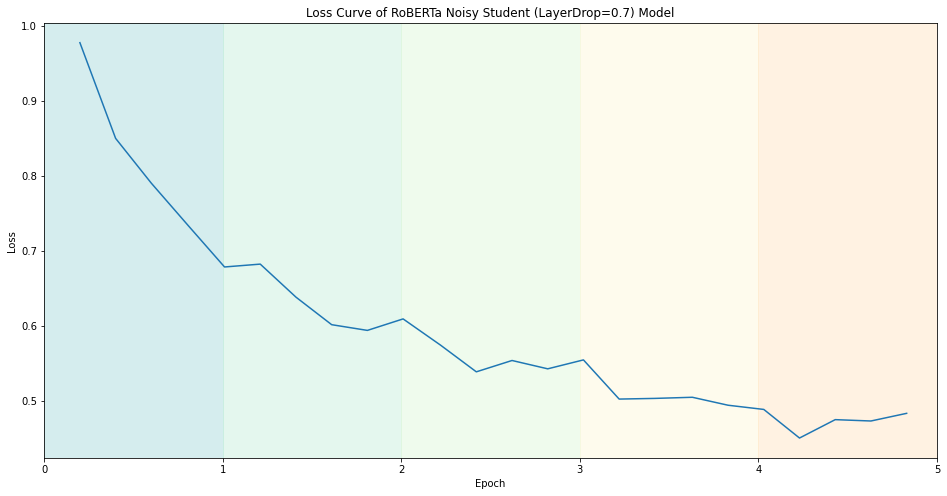

In [59]:
rob4Loss, rob4Train, rob4Eval = plot(logs[3], 0.7)

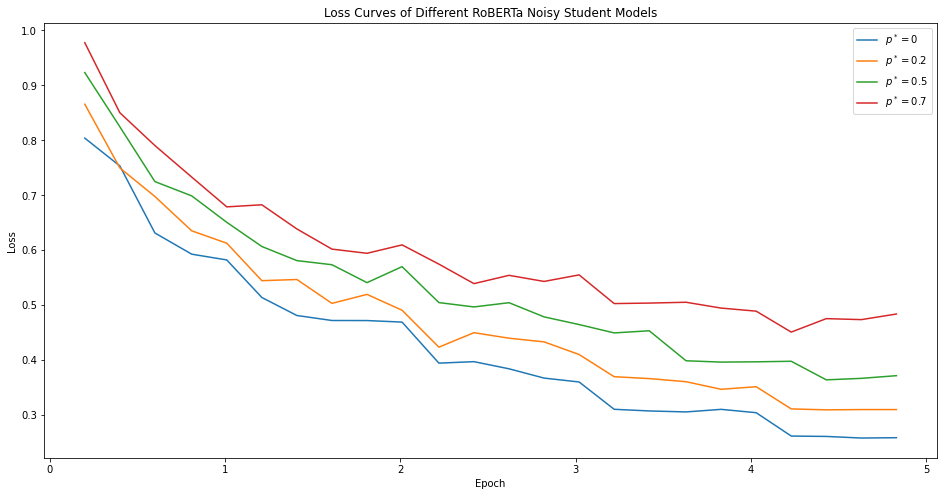

In [60]:
fig, ax = plt.subplots(figsize=(16, 8))
rob1Loss.plot(y="loss", x="epoch", label=f"$p^* = 0$", ax=ax)
rob2Loss.plot(y="loss", x="epoch", label=f"$p^* = 0.2$", ax=ax)
rob3Loss.plot(y="loss", x="epoch", label=f"$p^* = 0.5$", ax=ax)
rob4Loss.plot(y="loss", x="epoch", label=f"$p^* = 0.7$", ax=ax)
_ = ax.set(ylabel="Loss", xlabel="Epoch", title="Loss Curves of Different RoBERTa Noisy Student Models") 

In [61]:
def evalCurves(col, label=None, score=False):
    if label is None: label = col.title()
    if score: label += " Score"
    fig, ax = plt.subplots(figsize=(16, 8))
    rob1Eval.plot(y="eval_"+col, label=f"$p^* = 0$", ax=ax)
    rob2Eval.plot(y="eval_"+col, label=f"$p^* = 0.2$", ax=ax)
    rob3Eval.plot(y="eval_"+col, label=f"$p^* = 0.5$", ax=ax)
    rob4Eval.plot(y="eval_"+col, label=f"$p^* = 0.7$", ax=ax)
    _ = ax.set(ylabel="Evaluation "+label, xlabel="Epoch", title="Evaluation "+label+" (per Epoch) of Different RoBERTa Noisy Student Models")

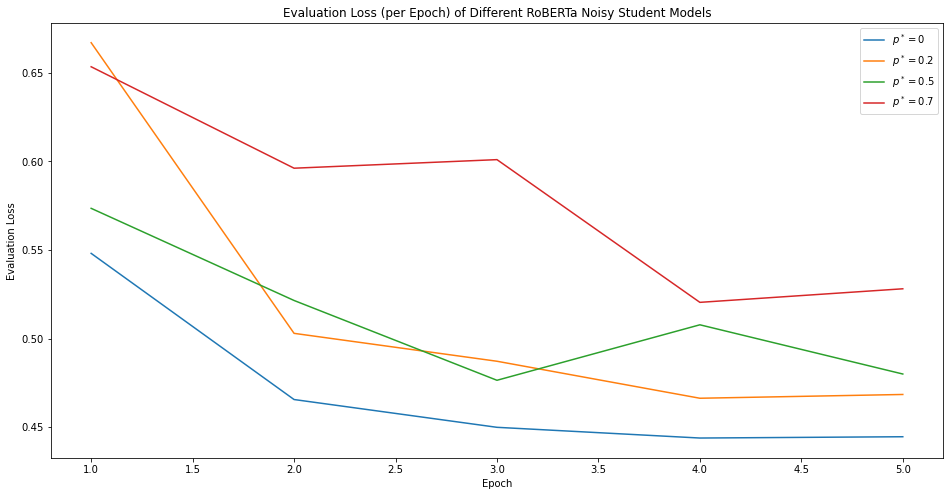

In [62]:
evalCurves("loss")

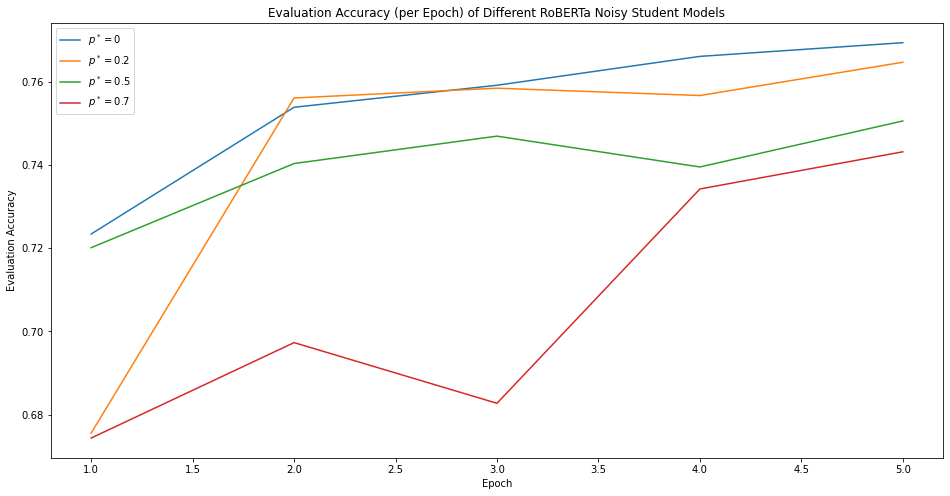

In [63]:
evalCurves("accuracy")

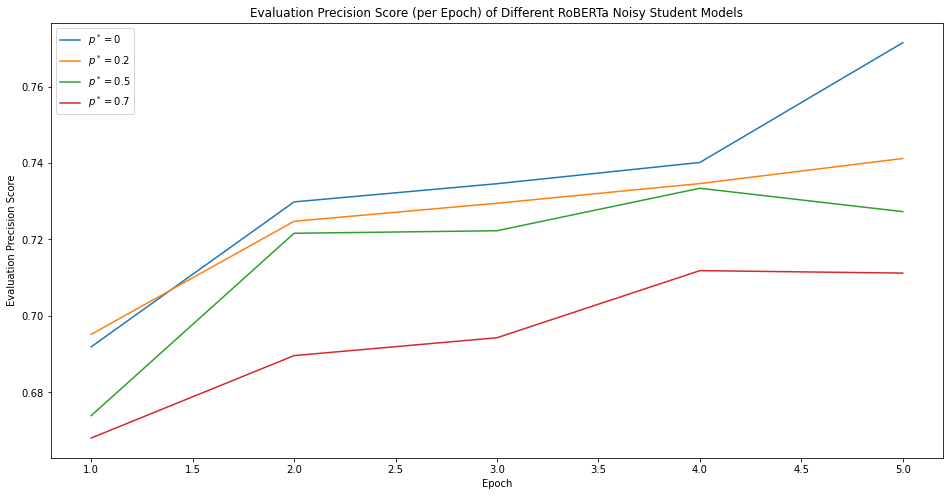

In [64]:
evalCurves("precision", score=True)

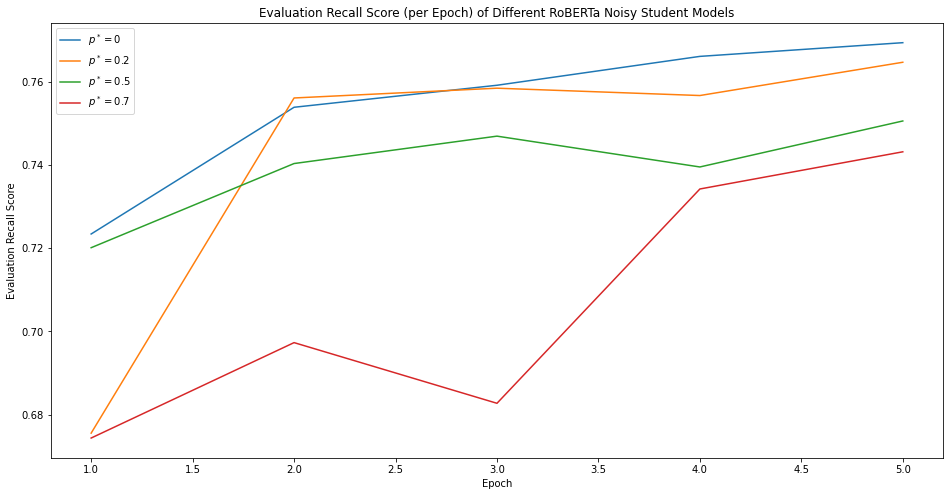

In [65]:
evalCurves("recall", score=True)

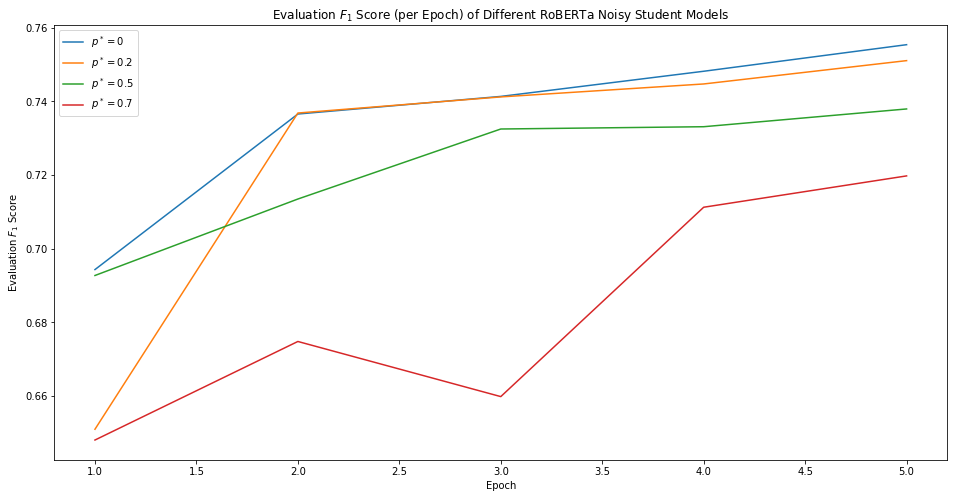

In [66]:
evalCurves("f1", "$F_1$", score=True)

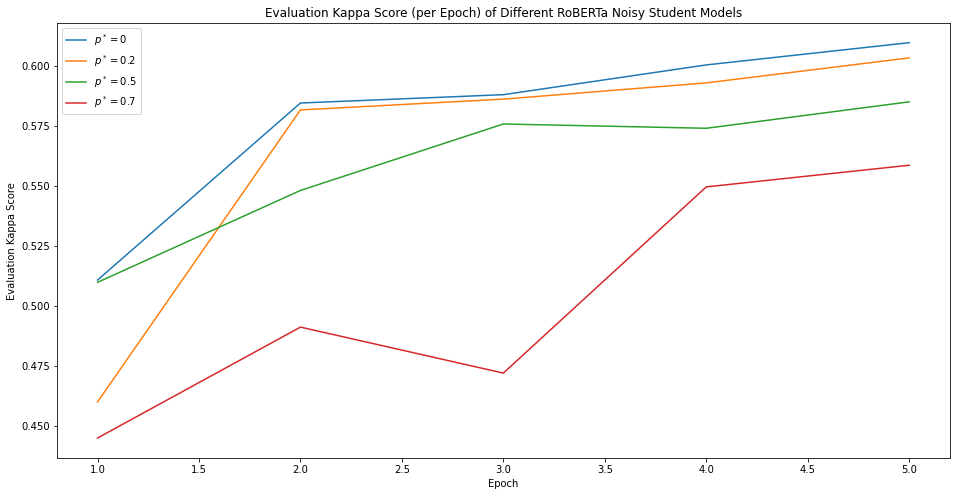

In [67]:
evalCurves("kappa", score=True)

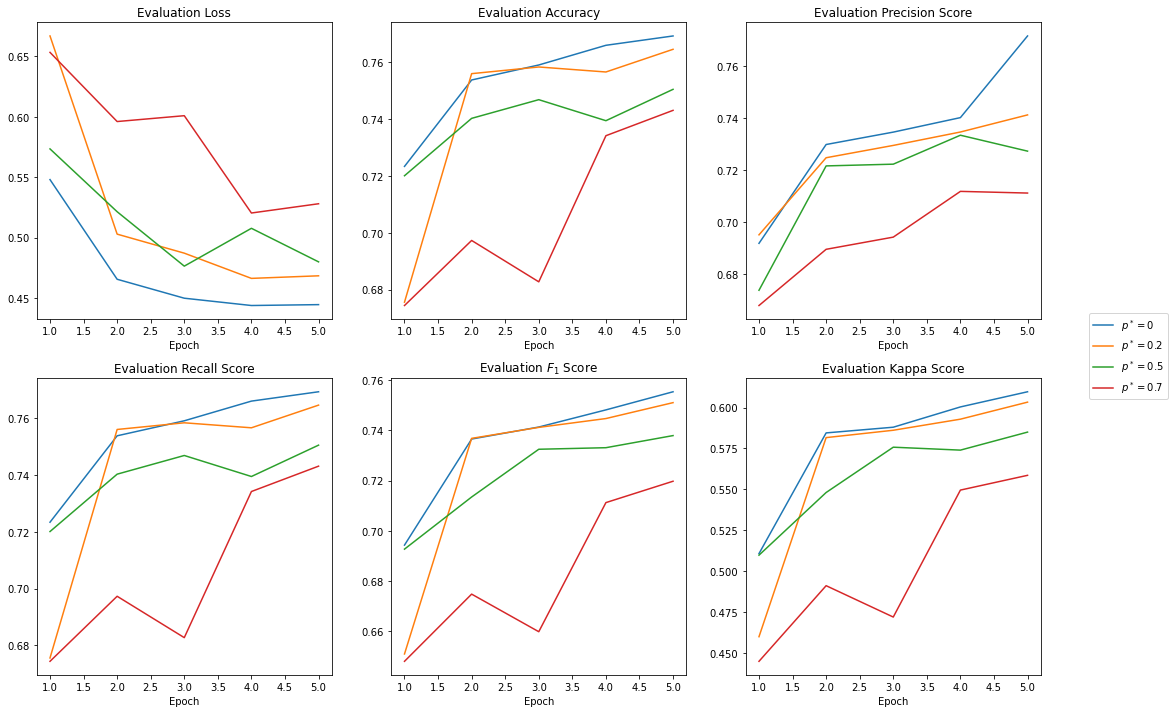

In [78]:
def evalCurves2(ax, col, label=None, score=False):
    if label is None: label = col.title()
    if score: label += " Score"
    #fig, ax = plt.subplots(figsize=(16, 8))
    rob1Eval.plot(y="eval_"+col, label=f"$p^* = 0$", ax=ax)
    rob2Eval.plot(y="eval_"+col, label=f"$p^* = 0.2$", ax=ax)
    rob3Eval.plot(y="eval_"+col, label=f"$p^* = 0.5$", ax=ax)
    rob4Eval.plot(y="eval_"+col, label=f"$p^* = 0.7$", ax=ax)
    _ = ax.set(xlabel="Epoch", title="Evaluation "+label)

fig, axes = plt.subplots(2, 3,figsize=(18,12))
evalCurves2(axes[0,0], "loss")
evalCurves2(axes[0,1], "accuracy")
evalCurves2(axes[0,2], "precision", score=True)
evalCurves2(axes[1,0], "recall", score=True)
evalCurves2(axes[1,1], "f1", "$F_1$", score=True)
evalCurves2(axes[1,2], "kappa", score=True)

handles, labels = axes[1,2].get_legend_handles_labels()
for i in range(2):
    for j in range(3):
        axes[i, j].get_legend().remove()
        
fig.legend(handles, labels, loc='center right')
#fig.suptitle("Evaluation Metrics (per Epoch) of Different Models")

In [71]:
modelTrain = pd.DataFrame({"$p^* = 0$":rob1Train, "$p^* = 0.2$":rob2Train, "$p^* = 0.5$":rob3Train, "$p^* = 0.7$":rob4Train}).T
modelTrain

,train_runtime,train_samples_per_second,train_steps_per_second,total_flos,train_loss
$p^* = 0$,2554.3119,38.864,4.858,1.172670e+16,0.420690
$p^* = 0.2$,2231.3265,44.489,5.562,1.156851e+16,0.467435
$p^* = 0.5$,1778.7411,55.809,6.977,1.217570e+16,0.525816
$p^* = 0.7$,1442.5738,68.815,8.603,1.206952e+16,0.592163


<AxesSubplot:title={'center':'Training Loss of Each Student Model'}>

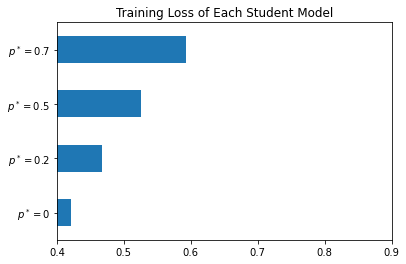

In [72]:
modelTrain.train_loss.plot.barh(xlim=(0.4, 0.9), title="Training Loss of Each Student Model")

<AxesSubplot:title={'center':'Training Runtime of Each Model'}>

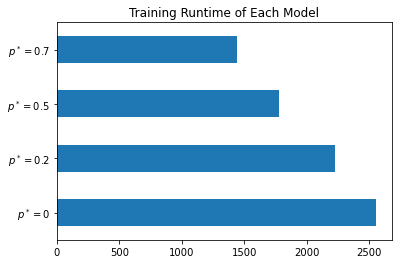

In [73]:
modelTrain.train_runtime.plot.barh(title="Training Runtime of Each Model")

In [85]:
def modelEval(func, name):
    df = pd.DataFrame({"$p^* = 0$":func(rob1Eval, axis=0), "$p^* = 0.2$":func(rob2Eval, axis=0), "$p^* = 0.5$":func(rob3Eval, axis=0), "$p^* = 0.7$":func(rob4Eval, axis=0)}).T
    fig, axes = plt.subplots(3, 2, figsize=(16,16))
    df.eval_loss.plot.barh(title=name+" Evaluation Loss for Each Model", ax=axes[0,0], xlim=(floor(df.eval_loss.min()*25)/25, ceil(df.eval_loss.max()*25)/25))
    df.eval_accuracy.plot.barh(title=name+" Evaluation Accuracy Score for Each Model", ax=axes[0,1], xlim=(floor(df.eval_accuracy.min()*25)/25, ceil(df.eval_accuracy.max()*25)/25))
    df.eval_precision.plot.barh(title=name+" Evaluation Precision Score for Each Model", ax=axes[1, 0], xlim=(floor(df.eval_precision.min()*25)/25, ceil(df.eval_precision.max()*25)/25))
    df.eval_recall.plot.barh(title=name+" Evaluation Recall Score for Each Model", ax=axes[1, 1], xlim=(floor(df.eval_recall.min()*25)/25, ceil(df.eval_recall.max()*25)/25))
    df.eval_f1.plot.barh(title=name+" Evaluation $F_1$ Score for Each Model", ax=axes[2,0], xlim=(floor(df.eval_f1.min()*25)/25, ceil(df.eval_f1.max()*25)/25))
    df.eval_kappa.plot.barh(title=name+" Evaluation Kappa Score for Each Model", ax=axes[2,1], xlim=(floor(df.eval_kappa.min()*25)/25, ceil(df.eval_kappa.max()*25)/25))
    plt.show()
    df.eval_runtime.plot.barh(title=name+" Evaluation Runtime for Each Model", figsize=(16, 8))
    plt.show()
    return df


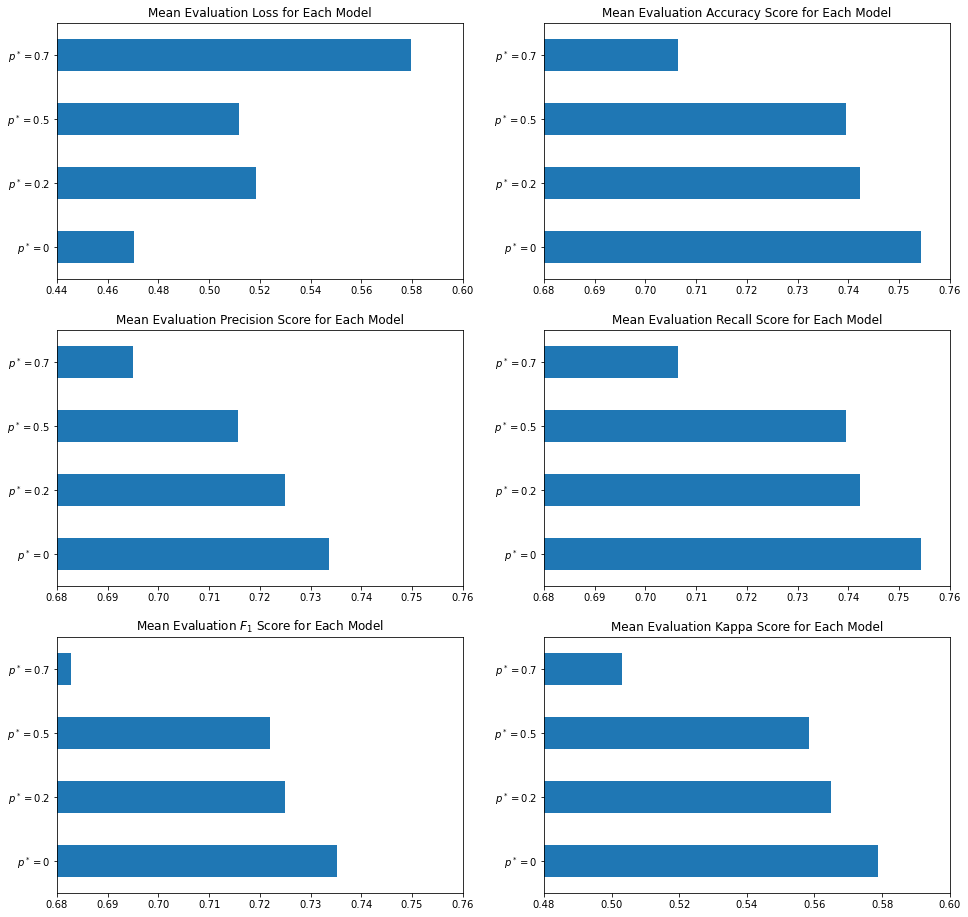

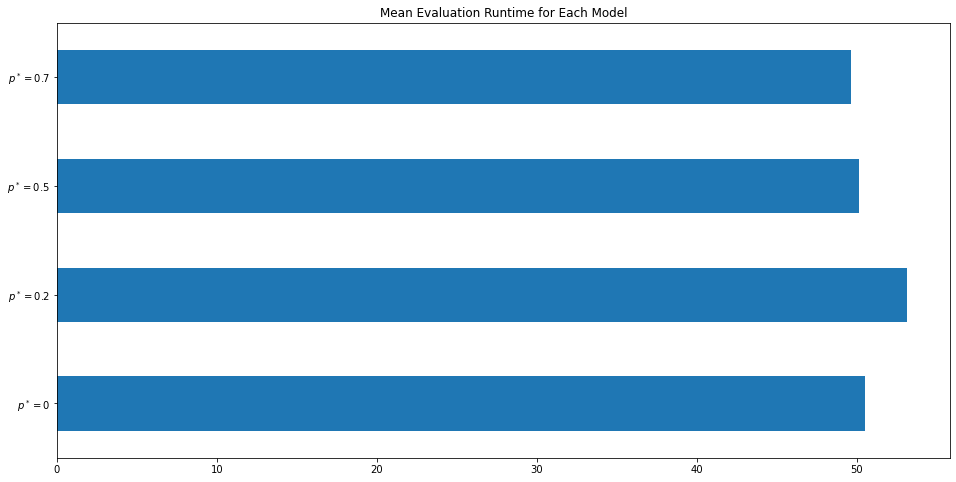

,eval_loss,eval_accuracy,eval_precision,eval_recall,eval_f1,eval_kappa,eval_runtime,eval_samples_per_second,eval_steps_per_second
$p^* = 0$,0.470401,0.754336,0.733597,0.754336,0.735139,0.578674,50.54012,168.4018,21.0552
$p^* = 0.2$,0.518354,0.742256,0.725044,0.742256,0.724942,0.564792,53.16964,160.0556,20.0116
$p^* = 0.5$,0.511818,0.739459,0.715692,0.739459,0.721935,0.558527,50.18686,169.5720,21.2016
$p^* = 0.7$,0.579765,0.706345,0.694984,0.706345,0.682736,0.503181,49.66768,171.4172,21.4322


In [86]:
modelEval(np.mean, "Mean")

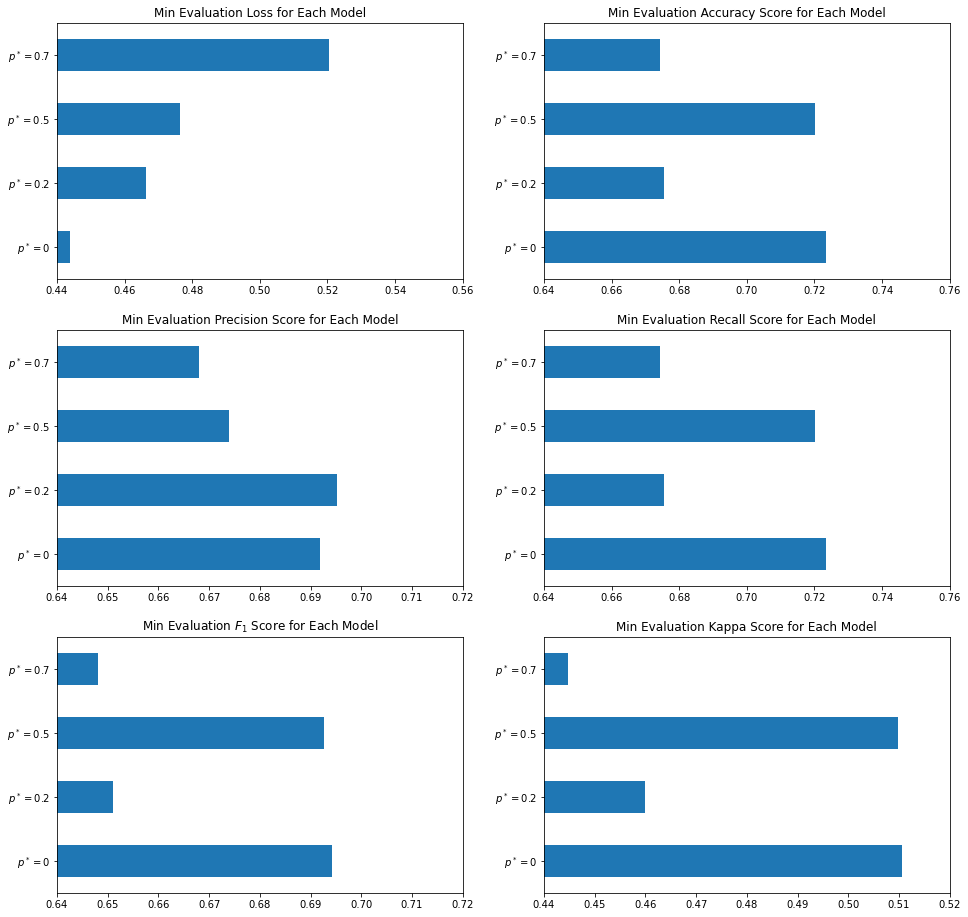

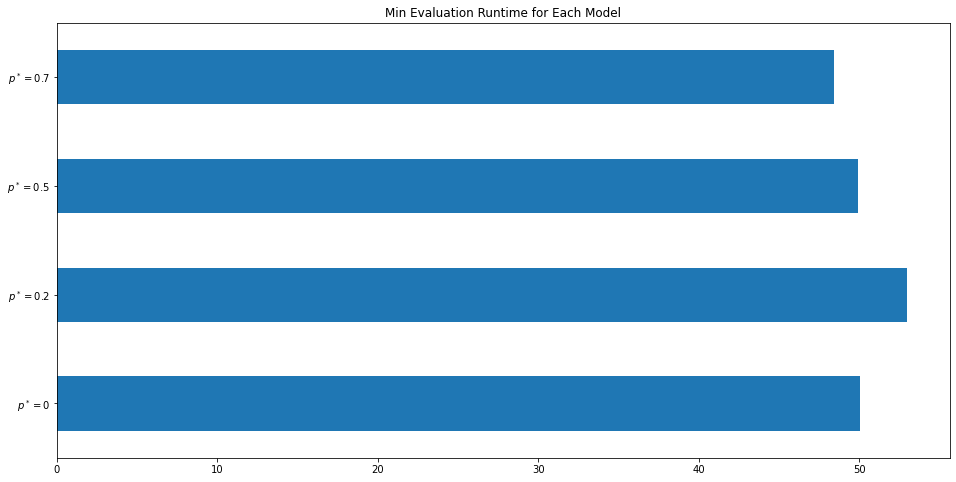

,eval_loss,eval_accuracy,eval_precision,eval_recall,eval_f1,eval_kappa,eval_runtime,eval_samples_per_second,eval_steps_per_second
$p^* = 0$,0.443865,0.723384,0.691889,0.723384,0.694317,0.510690,50.0215,165.520,20.695
$p^* = 0.2$,0.466310,0.675558,0.695152,0.675558,0.650976,0.459864,52.9811,158.982,19.877
$p^* = 0.5$,0.476444,0.720094,0.673867,0.720094,0.692713,0.509747,49.9190,167.760,20.975
$p^* = 0.7$,0.520410,0.674383,0.668017,0.674383,0.648051,0.444804,48.4467,167.136,20.897


In [87]:
modelEval(np.min, "Min")

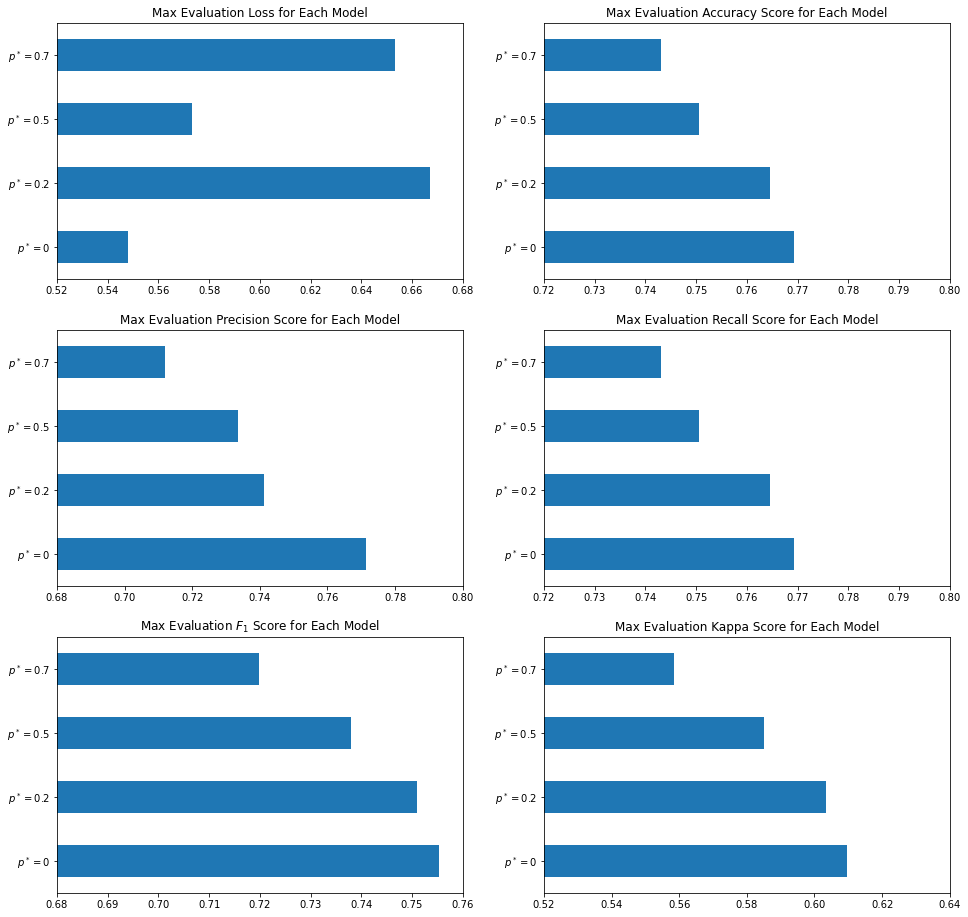

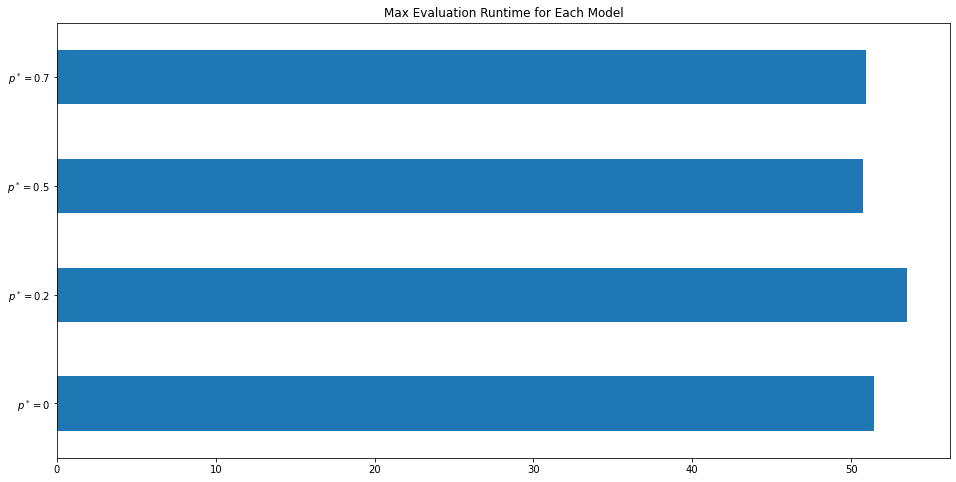

,eval_loss,eval_accuracy,eval_precision,eval_recall,eval_f1,eval_kappa,eval_runtime,eval_samples_per_second,eval_steps_per_second
$p^* = 0$,0.548047,0.769330,0.771512,0.769330,0.755363,0.609700,51.4136,170.127,21.271
$p^* = 0.2$,0.666907,0.764630,0.741199,0.764630,0.751036,0.603352,53.5279,160.623,20.083
$p^* = 0.5$,0.573451,0.750529,0.733402,0.750529,0.737919,0.585024,50.7272,170.476,21.315
$p^* = 0.7$,0.653327,0.743126,0.711838,0.743126,0.719747,0.558584,50.9167,175.657,21.962


In [88]:
modelEval(np.max, "Max")

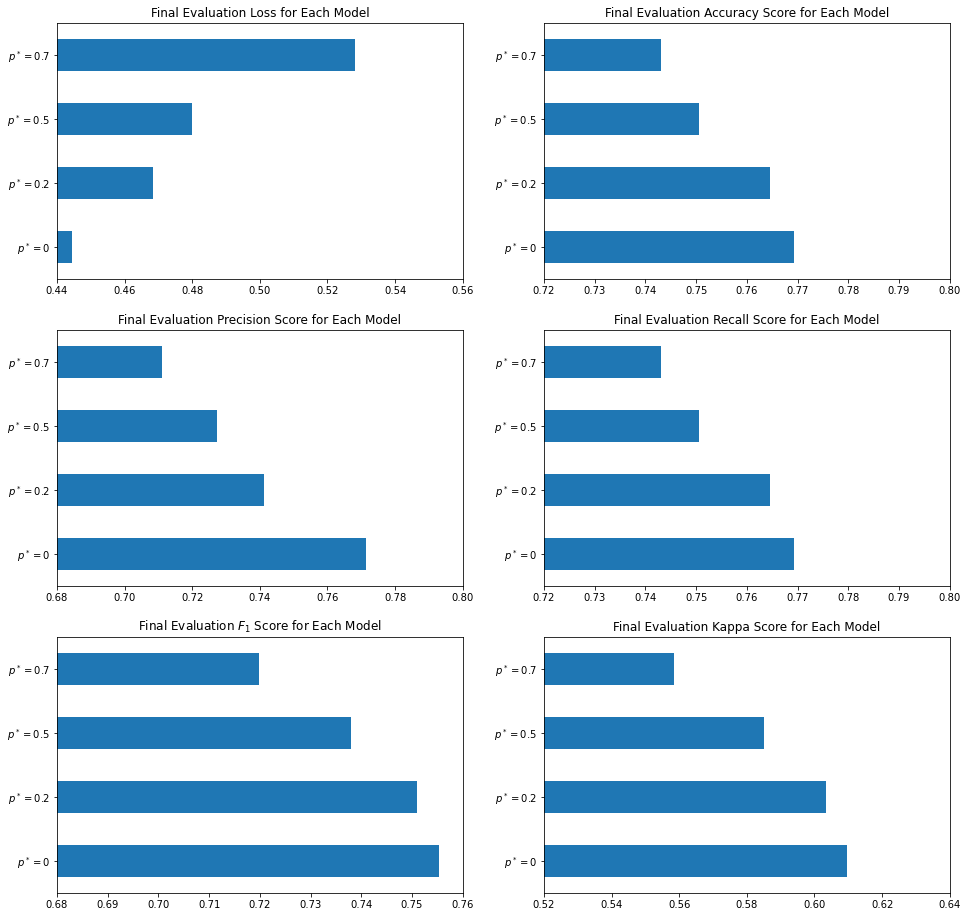

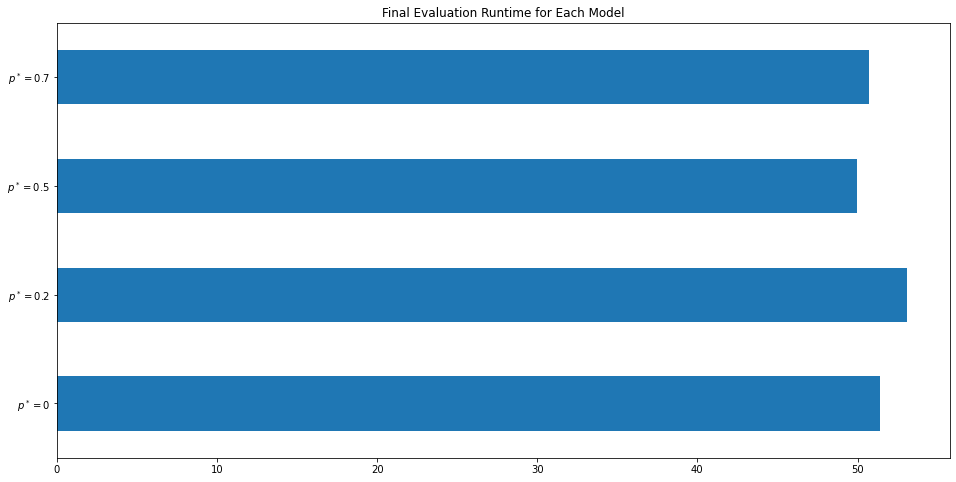

,eval_loss,eval_accuracy,eval_precision,eval_recall,eval_f1,eval_kappa,eval_runtime,eval_samples_per_second,eval_steps_per_second
$p^* = 0$,0.444596,0.769330,0.771512,0.769330,0.755363,0.609700,51.4136,165.520,20.695
$p^* = 0.2$,0.468442,0.764630,0.741199,0.764630,0.751036,0.603352,53.1000,160.264,20.038
$p^* = 0.5$,0.479982,0.750529,0.727288,0.750529,0.737919,0.585024,49.9435,170.392,21.304
$p^* = 0.7$,0.528063,0.743126,0.711194,0.743126,0.719747,0.558584,50.7172,167.793,20.979


In [93]:
def epoch5(df, axis=0):
    return df.loc[5]

epoch5Res = modelEval(epoch5, "Final")
epoch5Res

In [91]:
epoch5Res.columns

Index(['eval_loss', 'eval_accuracy', 'eval_precision', 'eval_recall',
       'eval_f1', 'eval_kappa', 'eval_runtime', 'eval_samples_per_second',
       'eval_steps_per_second'],
      dtype='object')

In [100]:
columns = ['eval_loss', 'eval_accuracy', 'eval_precision', 'eval_recall', 'eval_f1', 'eval_kappa', 'eval_runtime']
newLabels = ["Loss", "Accuracy", "Precision", "Recall", "$F_1$", "Kappa Score", "Runtime"]
evalMetrics = epoch5Res[columns].rename(columns=dict(zip(columns, newLabels))).round(3)
evalMetrics

,Loss,Accuracy,Precision,Recall,$F_1$,Kappa Score,Runtime
$p^* = 0$,0.445,0.769,0.772,0.769,0.755,0.610,51.414
$p^* = 0.2$,0.468,0.765,0.741,0.765,0.751,0.603,53.100
$p^* = 0.5$,0.480,0.751,0.727,0.751,0.738,0.585,49.944
$p^* = 0.7$,0.528,0.743,0.711,0.743,0.720,0.559,50.717


In [101]:
trainLoss = modelTrain[["train_loss"]].rename(columns={"train_loss":"Training Loss"}).round(3)
trainLoss

,Training Loss
$p^* = 0$,0.421
$p^* = 0.2$,0.467
$p^* = 0.5$,0.526
$p^* = 0.7$,0.592


In [102]:
pd.concat([trainLoss, evalMetrics], axis=1)

,Training Loss,Loss,Accuracy,Precision,Recall,$F_1$,Kappa Score,Runtime
$p^* = 0$,0.421,0.445,0.769,0.772,0.769,0.755,0.610,51.414
$p^* = 0.2$,0.467,0.468,0.765,0.741,0.765,0.751,0.603,53.100
$p^* = 0.5$,0.526,0.480,0.751,0.727,0.751,0.738,0.585,49.944
$p^* = 0.7$,0.592,0.528,0.743,0.711,0.743,0.720,0.559,50.717


In [106]:
!tree /f logs/roberta_noisy

Folder PATH listing for volume Acer
Volume serial number is 06F4-9C1C
C:\USERS\PRANNAYA\NUSH\CS5131\PROJECT\RESEARCH\LOGS\ROBERTA_NOISY
    roberta_noisy_layerdrop0.2_iter0.txt
    roberta_noisy_layerdrop0.2_iter1.txt
    roberta_noisy_layerdrop0.2_iter2.txt
    roberta_noisy_layerdrop_0.0.txt
    roberta_noisy_layerdrop_0.1.txt
    roberta_noisy_layerdrop_0.2.txt
    roberta_noisy_layerdrop_0.5.txt
    roberta_noisy_layerdrop_0.7.txt
    
No subfolders exist 



In [107]:
logs = []
for filename in glob("logs/roberta_noisy/roberta_noisy_layerdrop0.2_iter*.txt"):
    print(filename)
    with open(filename) as logfile:
        log = pd.DataFrame(list(map(eval, logfile.readlines())))
        logs.append(log)

logs[0]

logs/roberta_noisy\roberta_noisy_layerdrop0.2_iter0.txt
logs/roberta_noisy\roberta_noisy_layerdrop0.2_iter1.txt
logs/roberta_noisy\roberta_noisy_layerdrop0.2_iter2.txt


,loss,learning_rate,epoch,step,eval_loss,eval_accuracy,eval_precision,eval_recall,eval_f1,eval_kappa,eval_runtime,eval_samples_per_second,eval_steps_per_second,train_runtime,train_samples_per_second,train_steps_per_second,total_flos,train_loss
0,1.1681,1.984676e-05,0.04,500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0507,1.969351e-05,0.08,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.9874,1.954027e-05,0.11,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.9545,1.938702e-05,0.15,2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.9395,1.923378e-05,0.19,2500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,0.2734,3.846449e-07,4.90,64000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
132,0.2775,2.313999e-07,4.94,64500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
133,0.2639,7.815493e-08,4.98,65000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
134,NaN,NaN,5.00,65255,0.368529,0.816132,0.811,0.816132,0.811878,0.683713,182.7317,244.862,30.608,NaN,NaN,NaN,NaN,NaN


In [108]:
def plot(model, n):
    modelLoss = model[~model.loss.isna()].reset_index()[["loss", "learning_rate", "epoch", "step"]]
    modelTrain = model[model.loss.isna()].iloc[-1].dropna().drop(("epoch")).drop("step").to_dict()
    modelEval = model[model.loss.isna()].iloc[:-1].reset_index().drop(columns=["index", "loss", "learning_rate", "step", "train_runtime", "train_samples_per_second", "train_steps_per_second", "total_flos", "train_loss"])
    modelEval.epoch = modelEval.epoch.astype(int)
    modelEval = modelEval.set_index("epoch")
    ax = modelLoss.plot(y="loss", x="epoch", figsize=(16, 8), ylabel="Loss", xlabel="Epoch", title=f"Loss Curve of RoBERTa Noisy Student (Iteration={n}) Model", legend=False, xlim=(0,5))
    colors = ["#ACDDDE", "#CAF1DE", "#E1F8DC", "#FEF8DD", "#FFE7C7", "#F7D8BA", "#D6CDEA"]
    #colors = ["#003049", "#D62828", "#FF7F00", "#FCBF49", "#EAE2B7"]
    #colors = ["#581845", "#900C3F", "#C70039", "#FF5733", "#FFC300"]
    for epoch, color in zip(range(5), colors):
        ax.axvspan(epoch, epoch+1, alpha=0.5, color=color)
    return modelLoss, modelTrain, modelEval

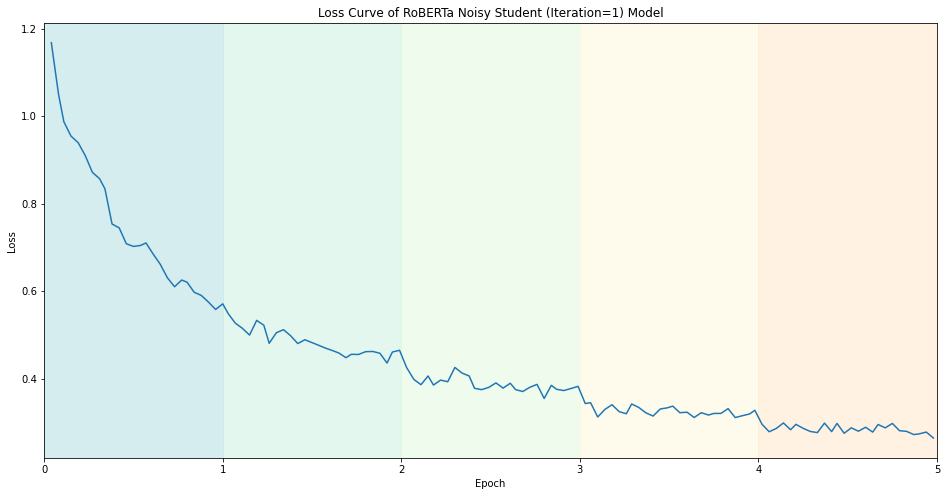

In [109]:
rob1Loss, rob1Train, rob1Eval = plot(logs[0], 1)

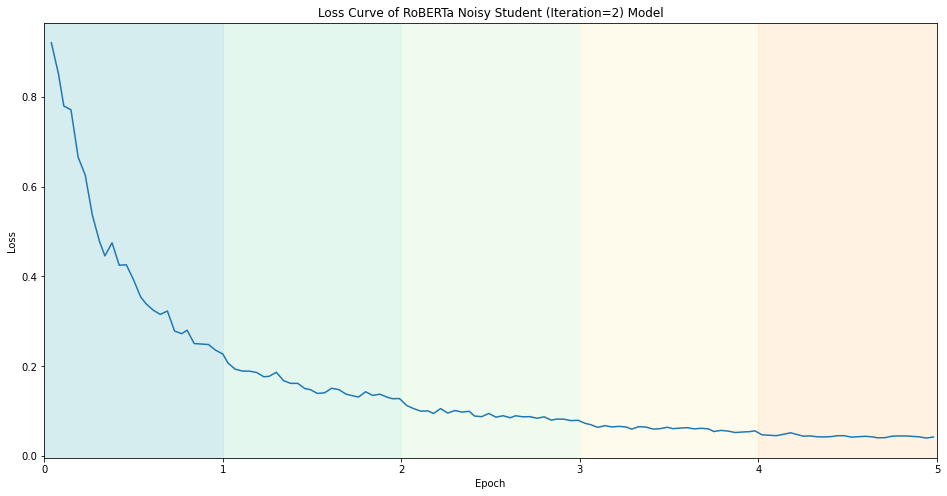

In [110]:
rob2Loss, rob2Train, rob2Eval = plot(logs[1], 2)

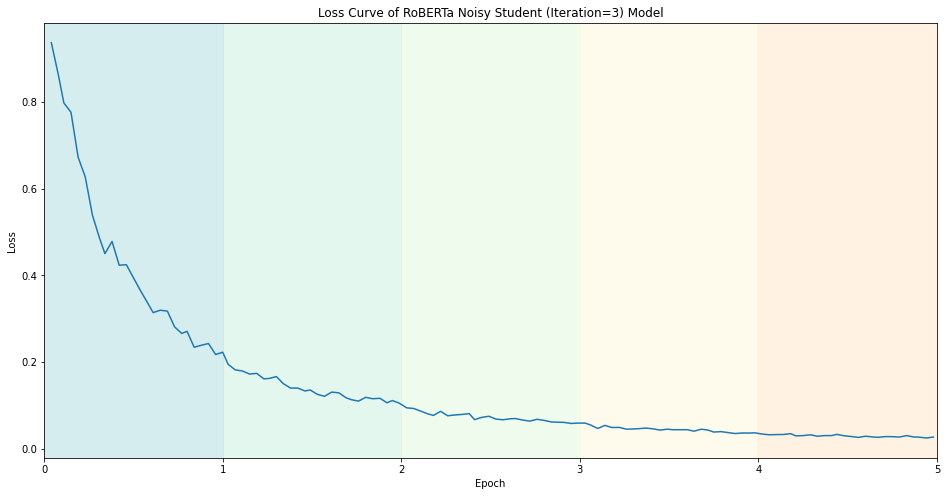

In [111]:
rob3Loss, rob3Train, rob3Eval = plot(logs[2], 3)

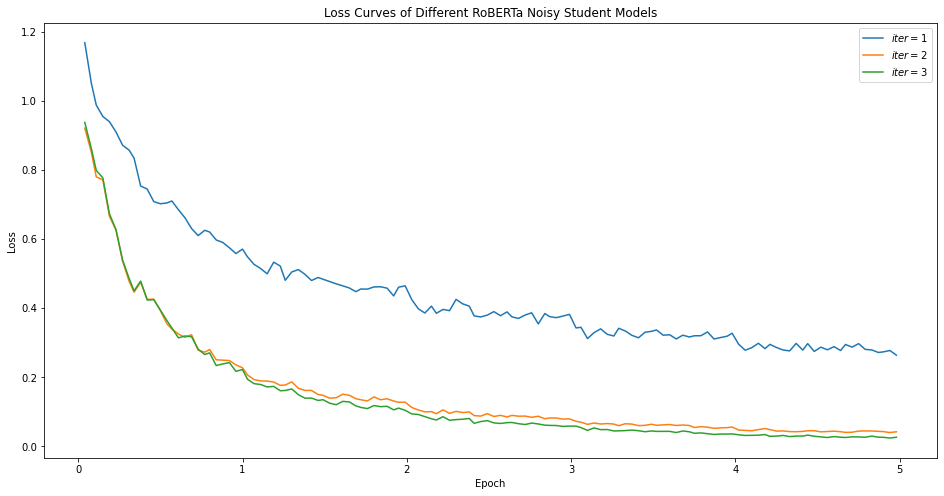

In [113]:
fig, ax = plt.subplots(figsize=(16, 8))
rob1Loss.plot(y="loss", x="epoch", label=f"$iter = 1$", ax=ax)
rob2Loss.plot(y="loss", x="epoch", label=f"$iter = 2$", ax=ax)
rob3Loss.plot(y="loss", x="epoch", label=f"$iter = 3$", ax=ax)
_ = ax.set(ylabel="Loss", xlabel="Epoch", title="Loss Curves of Different RoBERTa Noisy Student Models") 

In [114]:
def evalCurves(col, label=None, score=False):
    if label is None: label = col.title()
    if score: label += " Score"
    fig, ax = plt.subplots(figsize=(16, 8))
    rob1Eval.plot(y="eval_"+col, label=f"$iter = 1$", ax=ax)
    rob2Eval.plot(y="eval_"+col, label=f"$iter = 2$", ax=ax)
    rob3Eval.plot(y="eval_"+col, label=f"$iter = 3$", ax=ax)
    _ = ax.set(ylabel="Evaluation "+label, xlabel="Epoch", title="Evaluation "+label+" (per Epoch) of Different RoBERTa Noisy Student Models")

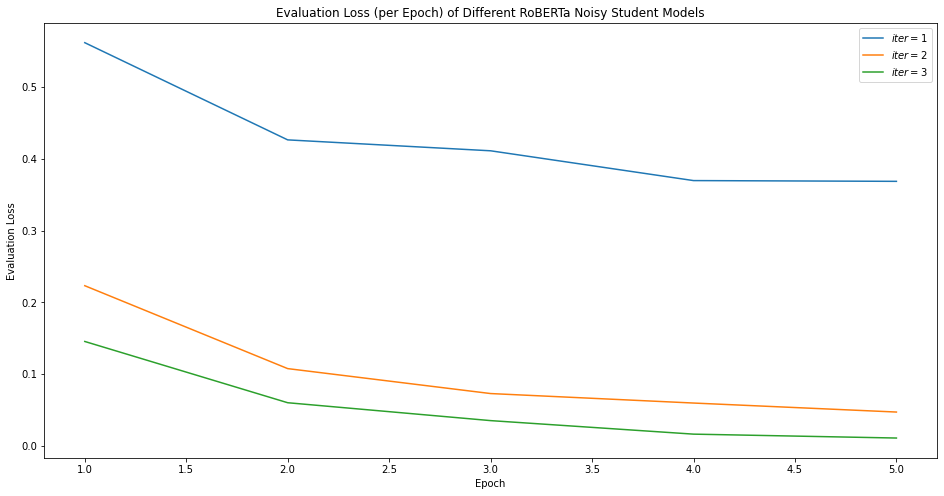

In [115]:
evalCurves("loss")

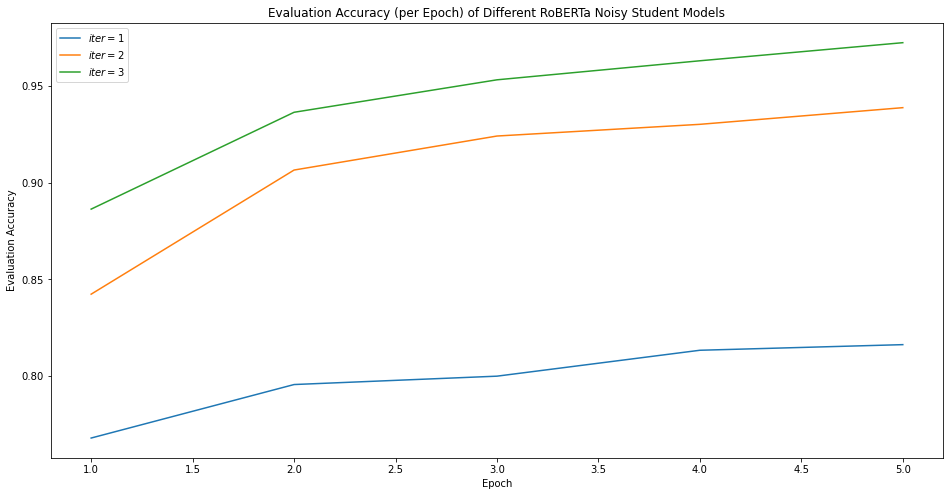

In [116]:
evalCurves("accuracy")

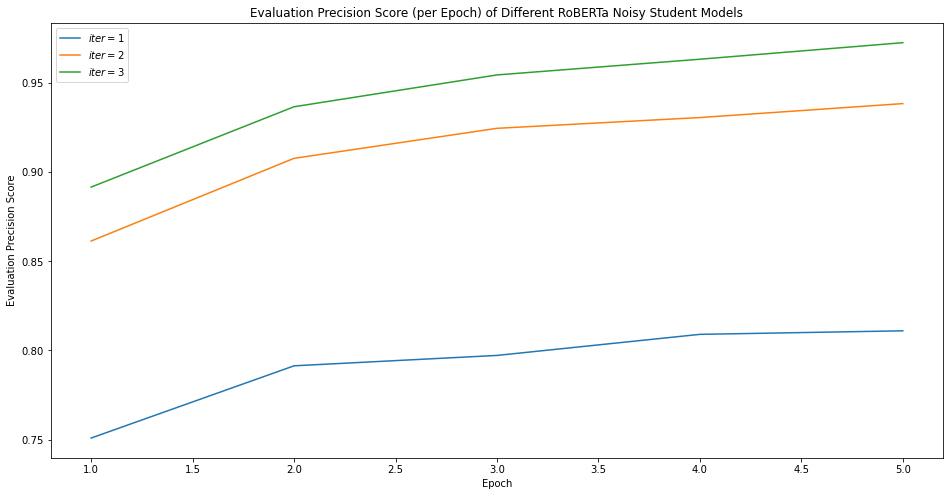

In [117]:
evalCurves("precision", score=True)

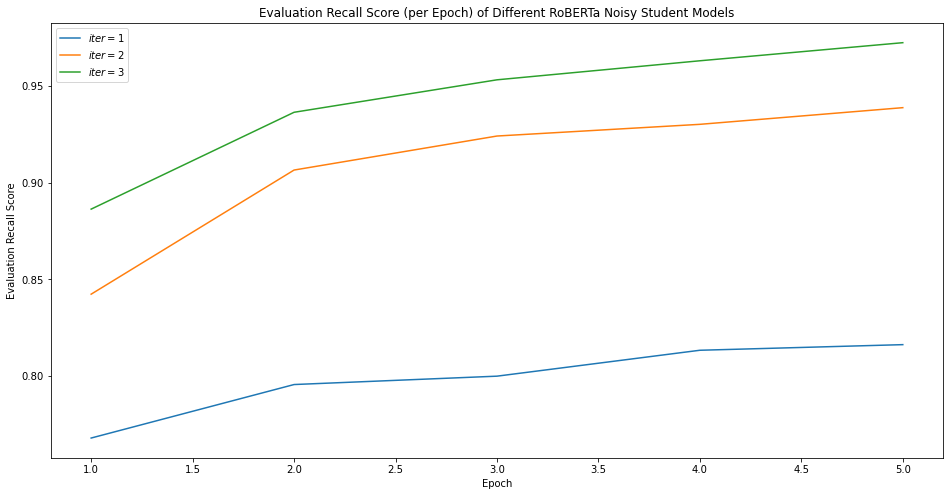

In [118]:
evalCurves("recall", score=True)

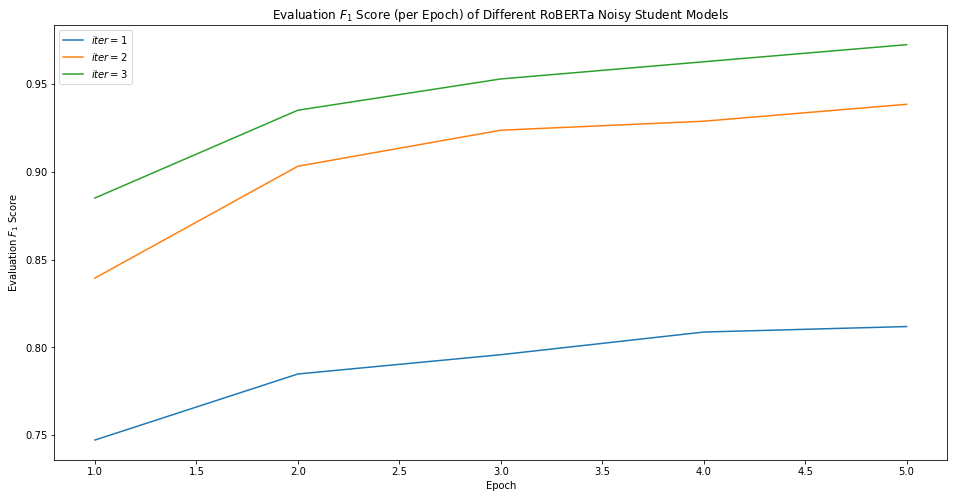

In [119]:
evalCurves("f1", "$F_1$", score=True)

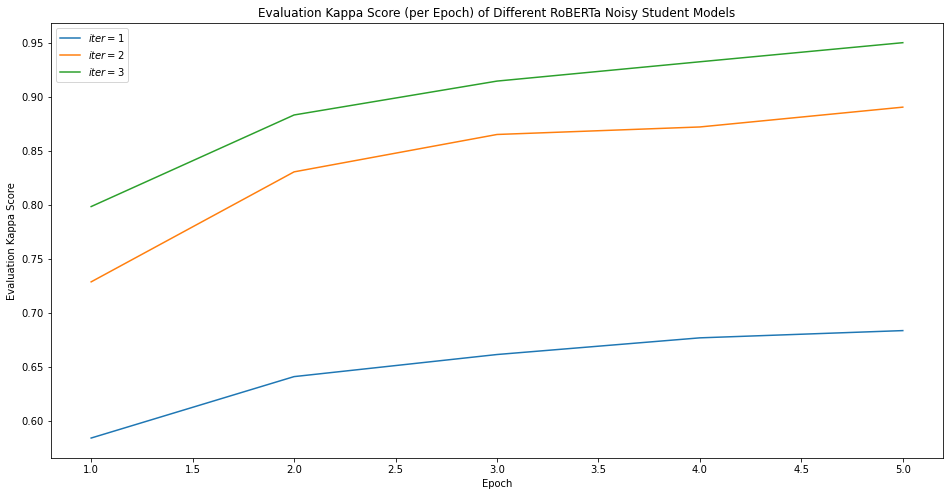

In [120]:
evalCurves("kappa", score=True)

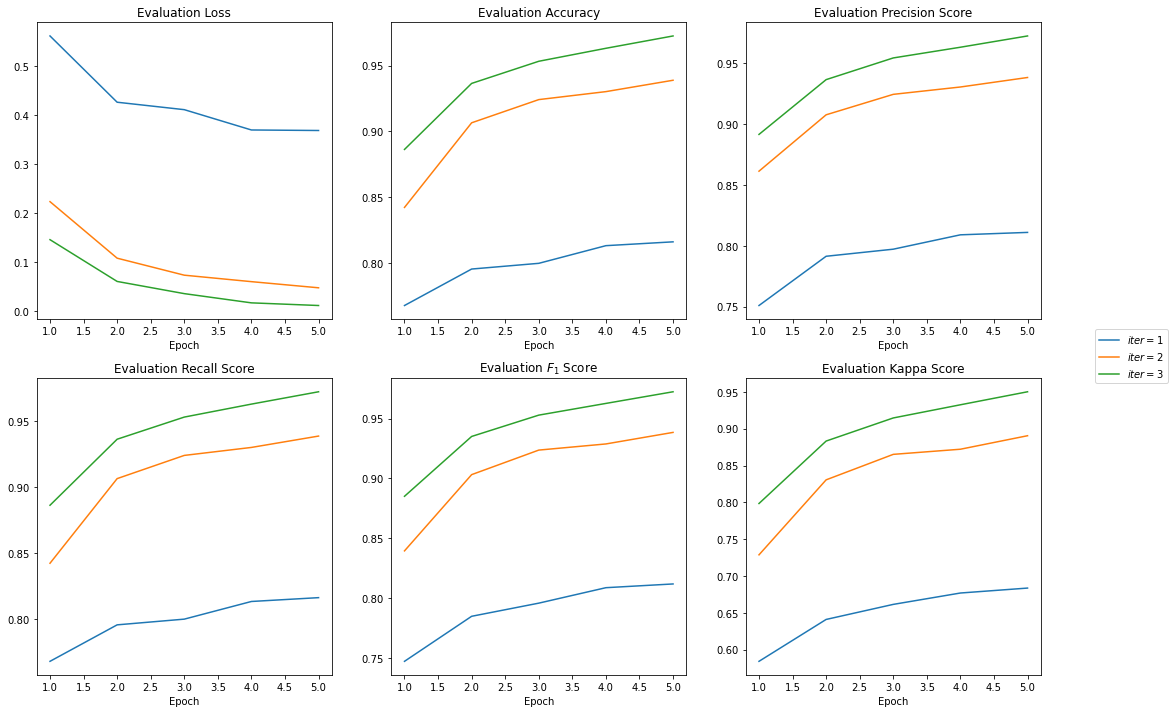

In [122]:
def evalCurves2(ax, col, label=None, score=False):
    if label is None: label = col.title()
    if score: label += " Score"
    #fig, ax = plt.subplots(figsize=(16, 8))
    rob1Eval.plot(y="eval_"+col, label=f"$iter = 1$", ax=ax)
    rob2Eval.plot(y="eval_"+col, label=f"$iter = 2$", ax=ax)
    rob3Eval.plot(y="eval_"+col, label=f"$iter = 3$", ax=ax)
    _ = ax.set(xlabel="Epoch", title="Evaluation "+label)

fig, axes = plt.subplots(2, 3,figsize=(18,12))
evalCurves2(axes[0,0], "loss")
evalCurves2(axes[0,1], "accuracy")
evalCurves2(axes[0,2], "precision", score=True)
evalCurves2(axes[1,0], "recall", score=True)
evalCurves2(axes[1,1], "f1", "$F_1$", score=True)
evalCurves2(axes[1,2], "kappa", score=True)

handles, labels = axes[1,2].get_legend_handles_labels()
for i in range(2):
    for j in range(3):
        axes[i, j].get_legend().remove()
        
fig.legend(handles, labels, loc='center right')
#fig.suptitle("Evaluation Metrics (per Epoch) of Different Models")

In [123]:
modelTrain = pd.DataFrame({"$iter = 1$":rob1Train, "$iter = 2$":rob2Train, "$iter = 3$":rob3Train}).T
modelTrain

,train_runtime,train_samples_per_second,train_steps_per_second,total_flos,train_loss
$iter = 1$,8805.3697,59.283,7.411,3.429074e+16,0.446269
$iter = 2$,8854.3056,58.955,7.370,3.429100e+16,0.158884
$iter = 3$,8906.4630,58.610,7.327,3.429100e+16,0.144672


<AxesSubplot:title={'center':'Training Loss of Each Student Model'}>

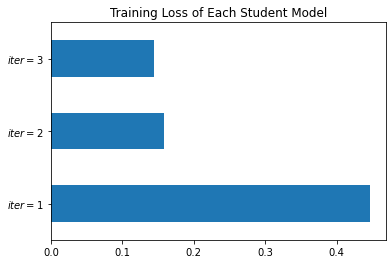

In [125]:
modelTrain.train_loss.plot.barh(title="Training Loss of Each Student Model")

<AxesSubplot:title={'center':'Training Runtime of Each Model'}>

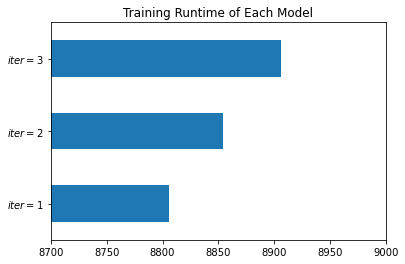

In [130]:
modelTrain.train_runtime.plot.barh(xlim=(8700, 9000), title="Training Runtime of Each Model")

In [131]:
def modelEval(func, name):
    df = pd.DataFrame({"$iter = 1$":func(rob1Eval, axis=0), "$iter = 2$":func(rob2Eval, axis=0), "$iter = 3$":func(rob3Eval, axis=0)}).T
    fig, axes = plt.subplots(3, 2, figsize=(16,16))
    df.eval_loss.plot.barh(title=name+" Evaluation Loss for Each Model", ax=axes[0,0], xlim=(floor(df.eval_loss.min()*25)/25, ceil(df.eval_loss.max()*25)/25))
    df.eval_accuracy.plot.barh(title=name+" Evaluation Accuracy Score for Each Model", ax=axes[0,1], xlim=(floor(df.eval_accuracy.min()*25)/25, ceil(df.eval_accuracy.max()*25)/25))
    df.eval_precision.plot.barh(title=name+" Evaluation Precision Score for Each Model", ax=axes[1, 0], xlim=(floor(df.eval_precision.min()*25)/25, ceil(df.eval_precision.max()*25)/25))
    df.eval_recall.plot.barh(title=name+" Evaluation Recall Score for Each Model", ax=axes[1, 1], xlim=(floor(df.eval_recall.min()*25)/25, ceil(df.eval_recall.max()*25)/25))
    df.eval_f1.plot.barh(title=name+" Evaluation $F_1$ Score for Each Model", ax=axes[2,0], xlim=(floor(df.eval_f1.min()*25)/25, ceil(df.eval_f1.max()*25)/25))
    df.eval_kappa.plot.barh(title=name+" Evaluation Kappa Score for Each Model", ax=axes[2,1], xlim=(floor(df.eval_kappa.min()*25)/25, ceil(df.eval_kappa.max()*25)/25))
    plt.show()
    df.eval_runtime.plot.barh(title=name+" Evaluation Runtime for Each Model", figsize=(16, 8))
    plt.show()
    return df


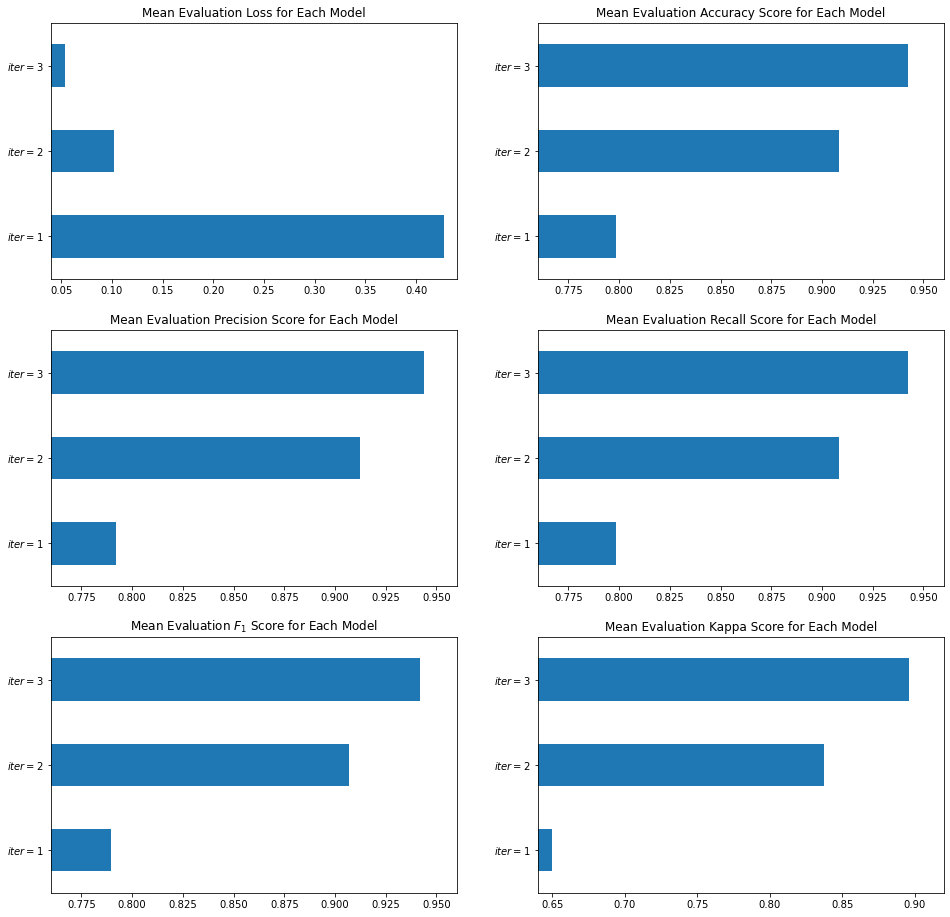

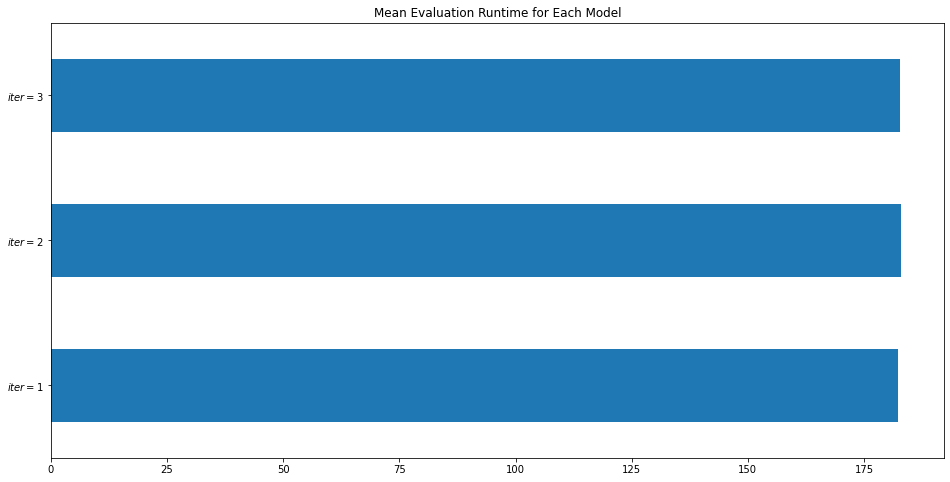

,eval_loss,eval_accuracy,eval_precision,eval_recall,eval_f1,eval_kappa,eval_runtime,eval_samples_per_second,eval_steps_per_second
$iter = 1$,0.427456,0.798489,0.791898,0.798489,0.789718,0.649553,182.35076,245.3746,30.6720
$iter = 2$,0.102018,0.908377,0.912489,0.908377,0.906742,0.837413,183.00580,244.4968,30.5622
$iter = 3$,0.053513,0.942289,0.943673,0.942289,0.941642,0.895737,182.77270,244.8072,30.6008


In [132]:
modelEval(np.mean, "Mean")

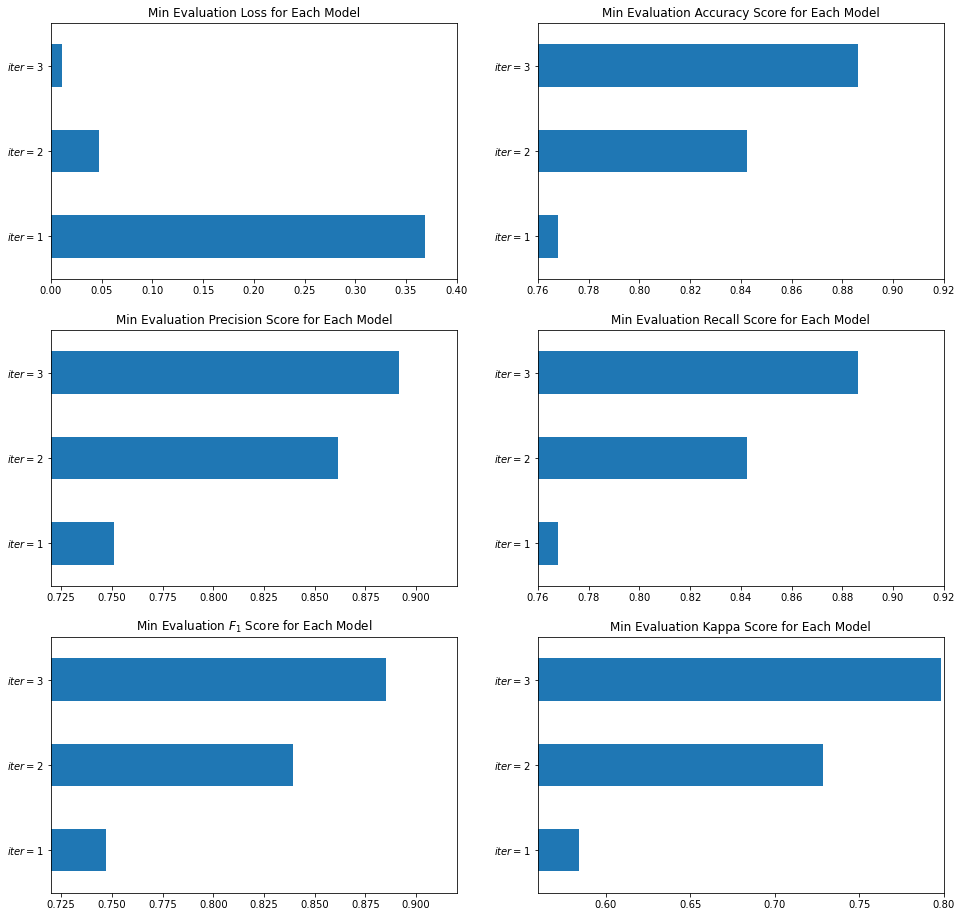

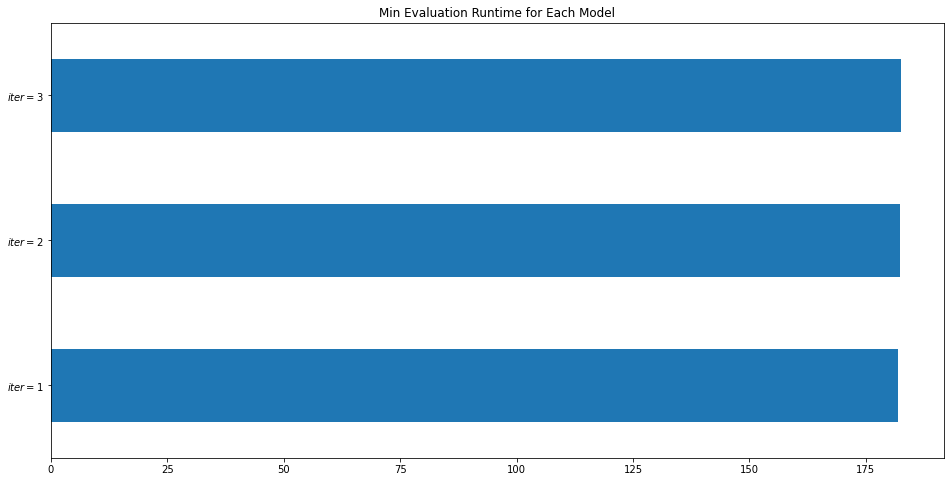

,eval_loss,eval_accuracy,eval_precision,eval_recall,eval_f1,eval_kappa,eval_runtime,eval_samples_per_second,eval_steps_per_second
$iter = 1$,0.368529,0.767790,0.750894,0.767790,0.747248,0.584322,181.8514,244.614,30.577
$iter = 2$,0.047032,0.842258,0.861339,0.842258,0.839505,0.728810,182.4013,243.626,30.453
$iter = 3$,0.010822,0.886286,0.891567,0.886286,0.885104,0.798464,182.5830,244.248,30.531


In [133]:
modelEval(np.min, "Min")

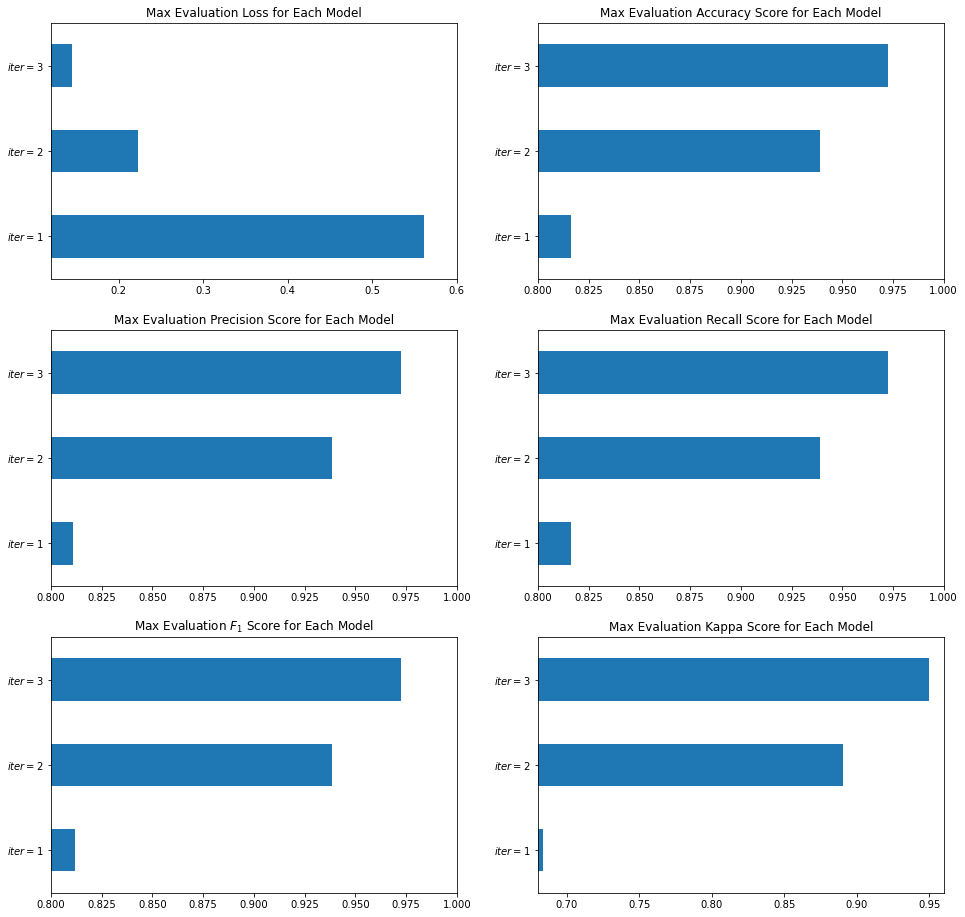

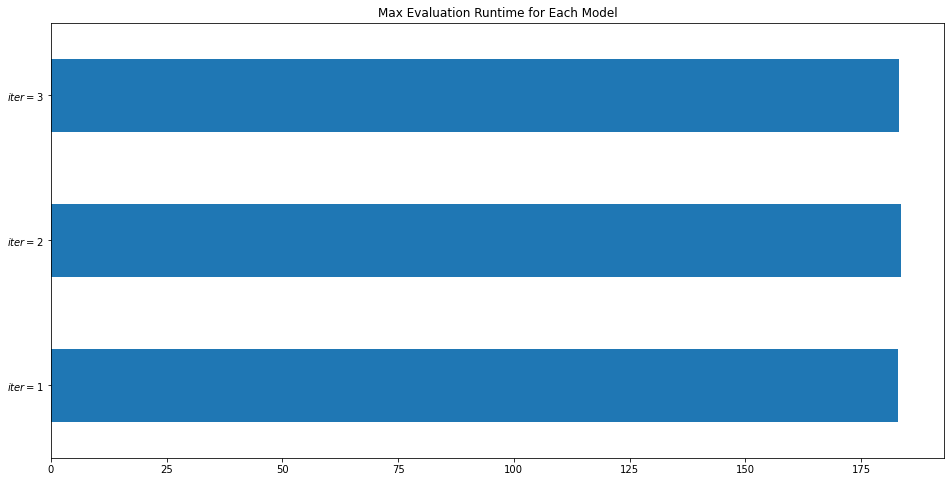

,eval_loss,eval_accuracy,eval_precision,eval_recall,eval_f1,eval_kappa,eval_runtime,eval_samples_per_second,eval_steps_per_second
$iter = 1$,0.561750,0.816132,0.811000,0.816132,0.811878,0.683713,182.9167,246.047,30.756
$iter = 2$,0.223096,0.938807,0.938362,0.938807,0.938477,0.890433,183.6585,245.305,30.663
$iter = 3$,0.145386,0.972443,0.972512,0.972443,0.972420,0.950074,183.1909,245.061,30.633


In [134]:
modelEval(np.max, "Max")

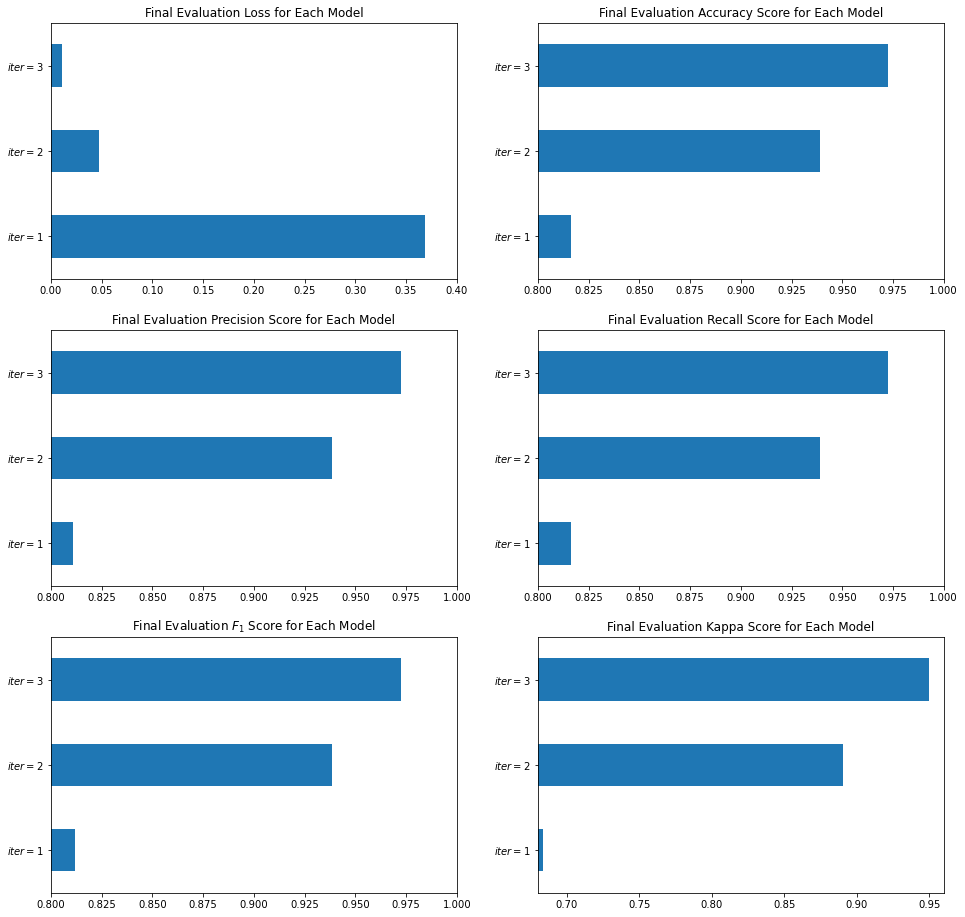

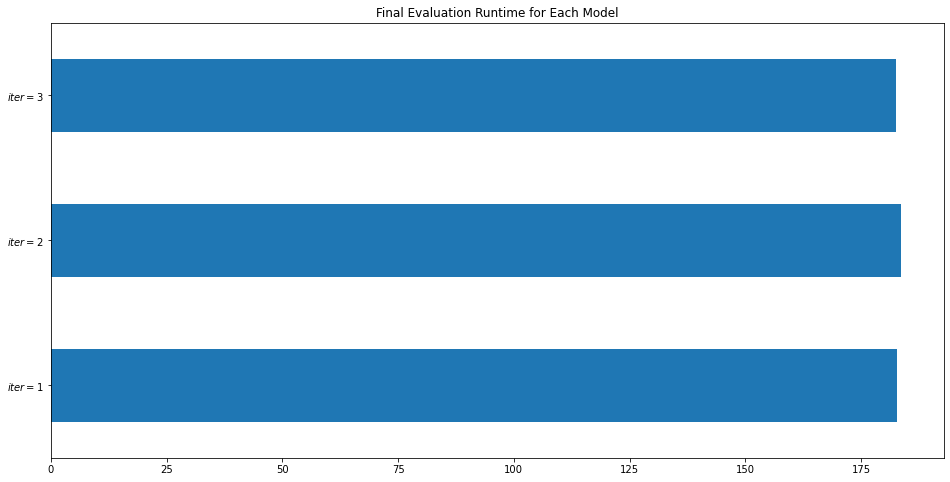

,eval_loss,eval_accuracy,eval_precision,eval_recall,eval_f1,eval_kappa,eval_runtime,eval_samples_per_second,eval_steps_per_second
$iter = 1$,0.368529,0.816132,0.811000,0.816132,0.811878,0.683713,182.7317,244.862,30.608
$iter = 2$,0.047032,0.938807,0.938362,0.938807,0.938477,0.890433,183.6585,243.626,30.453
$iter = 3$,0.010822,0.972443,0.972512,0.972443,0.972420,0.950074,182.6381,244.987,30.623


In [135]:
epoch5Res = modelEval(epoch5, "Final")
epoch5Res

In [141]:
columns = ['eval_loss', 'eval_accuracy', 'eval_precision', 'eval_recall', 'eval_f1', 'eval_kappa']
newLabels = ["$\mathcal{L}_{eval}$", "Accuracy", "Precision", "Recall", "$F_1$", "$\kappa$"]
evalMetrics = epoch5Res[columns].rename(columns=dict(zip(columns, newLabels))).round(3)
evalMetrics

,$\mathcal{L}_{eval}$,Accuracy,Precision,Recall,$F_1$,$\kappa$
$iter = 1$,0.369,0.816,0.811,0.816,0.812,0.684
$iter = 2$,0.047,0.939,0.938,0.939,0.938,0.890
$iter = 3$,0.011,0.972,0.973,0.972,0.972,0.950


In [142]:
trainLoss = modelTrain[["train_loss"]].rename(columns={"train_loss":"$\mathcal{L}_{train}$"}).round(3)
trainLoss

,$\mathcal{L}_{train}$
$iter = 1$,0.446
$iter = 2$,0.159
$iter = 3$,0.145


In [143]:
pd.concat([trainLoss, evalMetrics], axis=1)

,$\mathcal{L}_{train}$,$\mathcal{L}_{eval}$,Accuracy,Precision,Recall,$F_1$,$\kappa$
$iter = 1$,0.446,0.369,0.816,0.811,0.816,0.812,0.684
$iter = 2$,0.159,0.047,0.939,0.938,0.939,0.938,0.890
$iter = 3$,0.145,0.011,0.972,0.973,0.972,0.972,0.950


In [145]:
print(pd.concat([trainLoss, evalMetrics], axis=1).to_latex())

\begin{tabular}{lrrrrrrr}
\toprule
{} &  \$\textbackslash mathcal\{L\}\_\{train\}\$ &  \$\textbackslash mathcal\{L\}\_\{eval\}\$ &  Accuracy &  Precision &  Recall &  \$F\_1\$ &  \$\textbackslash kappa\$ \\
\midrule
\$iter = 1\$ &                  0.446 &                 0.369 &     0.816 &      0.811 &   0.816 &  0.812 &     0.684 \\
\$iter = 2\$ &                  0.159 &                 0.047 &     0.939 &      0.938 &   0.939 &  0.938 &     0.890 \\
\$iter = 3\$ &                  0.145 &                 0.011 &     0.972 &      0.973 &   0.972 &  0.972 &     0.950 \\
\bottomrule
\end{tabular}

